In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/Bengaluru_House_Data.csv")

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

| Column     | Type                         | ML Meaning         |
| ---------- | ---------------------------- | ------------------ |
| location   | Categorical                  | Area affects price |
| size       | Categorical (needs cleaning) | BHK info           |
| total_sqft | Numerical (but messy)        | Area               |
| bath       | Numerical                    | Bathrooms          |
| balcony    | Numerical                    | Extra feature      |
| price      | Numerical                    | 🎯 Target          |


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

| Column        | Missing Values |
|---------------|----------------|
| area_type     | 0              |
| availability  | 0              |
| location      | 1              |
| size          | 16             |
| society       | 5502           |
| total_sqft    | 0              |
| bath          | 73             |
| balcony       | 609            |
| price         | 0              |


In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


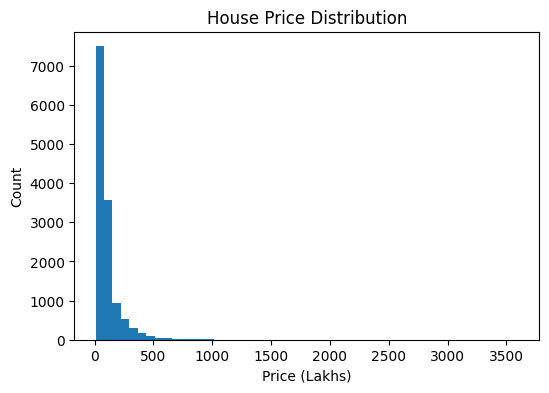

In [9]:
plt.figure(figsize=(6,4))
plt.hist(df['price'], bins=50)
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.title("House Price Distribution")
plt.show()


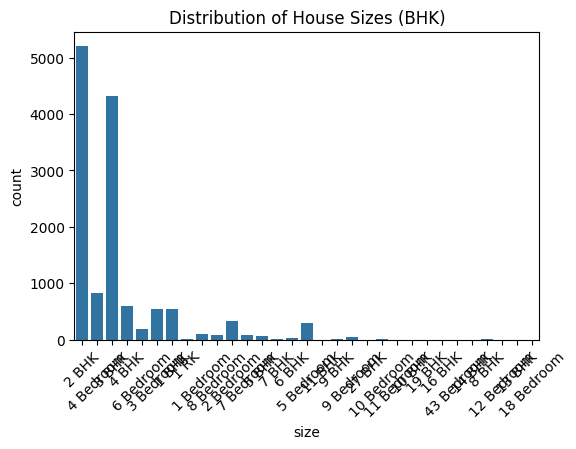

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='size', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of House Sizes (BHK)")
plt.show()


Most houses are 2–3 BHK, very large houses are rare.

In [11]:
df['location'].value_counts().head(10)

location
Whitefield               540
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
Yelahanka                213
Uttarahalli              186
Hebbal                   177
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: count, dtype: int64

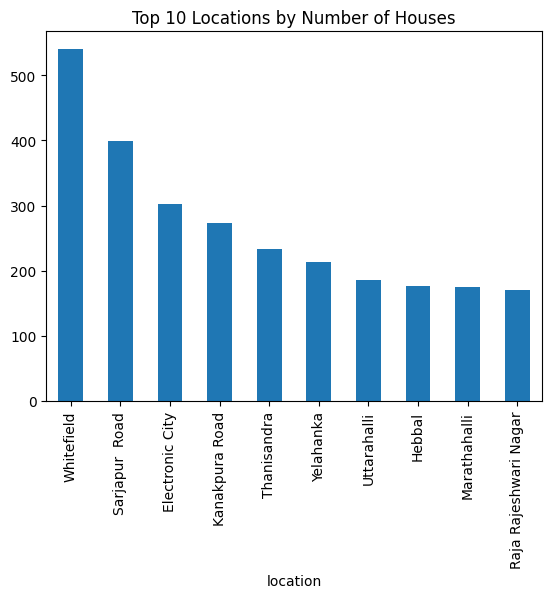

In [12]:
df['location'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Locations by Number of Houses")
plt.show()


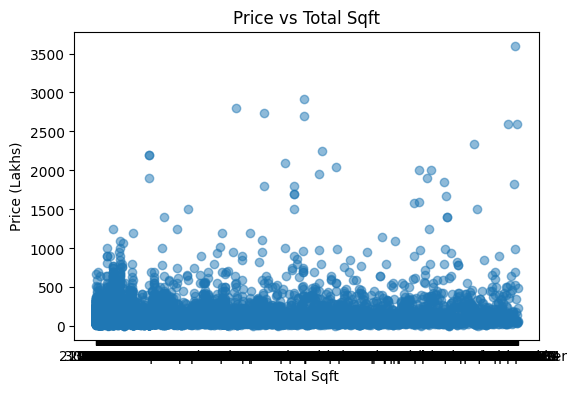

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5)
plt.xlabel("Total Sqft")
plt.ylabel("Price (Lakhs)")
plt.title("Price vs Total Sqft")
plt.show()


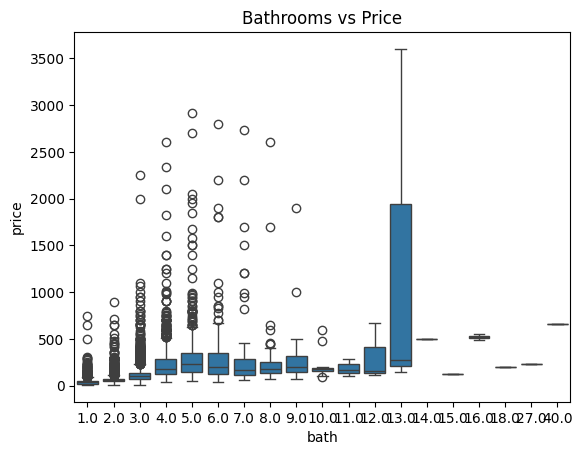

In [14]:
sns.boxplot(x='bath', y='price', data=df)
plt.title("Bathrooms vs Price")
plt.show()


Price is right-skewed

Location is highly influential

Some houses have illogical values

Outliers exist in sqft and price

In [15]:
df = df.drop(['area_type', 'availability', 'society'], axis=1)

Why?

Too many missing values

Low predictive power

Adds noise for beginners

In [16]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [17]:
df['bath'].fillna(df['bath'].median(), inplace=True)

In [18]:
df['balcony'].fillna(df['balcony'].median(), inplace=True)

In [19]:
df = df.dropna(subset=['location'])

Median is robust to outliers.

In [20]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


What it does:

df['size']
Selects the size column (e.g., values like "2 BHK", "3 Bedroom").

.apply(lambda x: ...)
Applies a function to each value in the column.

x.split(' ')
Splits the string into parts using space as the separator.
Example:
"2 BHK" → ['2', 'BHK']

int(x.split(' ')[0])
Takes the first part (the number) and converts it to an integer.

df['bhk'] = ...
Stores the extracted number in a new column called bhk.

In [23]:
df['size'] = df['size'].fillna('0 BHK')

In [24]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis=1)

In [25]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


We are now cleaning the total_sqft column where the data is like:
1. "1200"
2. "2100 - 2850"
3. "34.46Sq. Meter"

we split the data wrt '-' and then replace with the mean of them two

In [26]:
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        else:
            return float(x)
    except:
        return None

In [27]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft'])

In [28]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [29]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']

In [30]:
df = df[df['total_sqft'] / df['bhk'] >= 300]

In [31]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [32]:
df.shape

(12529, 7)

We handle location column, group rare location as other 

In [33]:
location_stats = df['location'].value_counts()
location_stats_less_than_10 = location_stats[location_stats <= 10]

df['location'] = df['location'].apply(lambda x: 'Other' if x in location_stats_less_than_10 else x) 

In [39]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


We remove outliers location-wise, not globally.

Logic:

For each location:

Keep values within mean ± 1 std

In [40]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)

In [44]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509


Rule:

A 3 BHK should not be cheaper than a 2 BHK in same location.

## Example (Very Simple)

### Input (Same Location)

| bhk | price_per_sqft |
|-----|----------------|
| 1   | 5000           |
| 1   | 5200           |
| 2   | 4800 ❌        |
| 2   | 5300           |
| 3   | 4900 ❌        |

- Mean of **1 BHK** ≈ **5100**
- ❌ **2 BHK** at **4800** → removed
- Mean of **2 BHK** ≈ **5050**
- ❌ **3 BHK** at **4900** → removed


In [45]:
def remove_pps_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values
                )
    return df.drop(exclude_indices, axis='index')

df = remove_pps_outliers(df)

In [48]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,4540.654699


In [49]:
df = df.drop('price_per_sqft', axis=1)

In [50]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2


One-hot encoding is a fundamental data preprocessing technique used in machine learning and digital systems to convert categorical variables into a binary format. This transformation ensures that machine learning algorithms, which primarily process numerical data, can interpret non-numeric categories without assuming a false mathematical order. 

In [51]:
dummies = pd.get_dummies(df['location'], drop_first=True)
df = pd.concat([df.drop('location', axis=1), dummies], axis=1)


Why drop_first=True?

- Prevents redundancy
- Avoids multicollinearity
- Improves linear model stability

In [52]:
X = df.drop('price', axis=1)
y = df['price']

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10320    100.0
10321    108.0
10323    185.0
10328    135.0
10329    160.0
Name: price, Length: 7313, dtype: float64